# 거래량 데이터 크롤링

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

page = 1
date_list = []
trading_volume_list = []

while 1:
    response1 = requests.get("https://finance.naver.com/item/sise_day.nhn?code=000880&page={}".format(page))
    bs1 = BeautifulSoup(response1.text)
    
    for data in bs1.find_all('tr', onmouseover='mouseOver(this)'):
        date = data.select('span.tah')[0].text
        trading_volume = int(data.select('span.tah')[6].text.replace(",", ""))
        
        if int(date.replace(".", "")) < 20150101:
            break
        
        print(date, trading_volume)

        date_list.append(date)
        trading_volume_list.append(trading_volume)

        
    if int(date.replace(".", "")) < 20150101:
        break

    print("------------------------------------------")
    print(str(page) + "페이지 완료")
    print("------------------------------------------")

    page += 1

---------------------------------------
69페이지 완료
------------------------------------------
2017.12.08 232177
2017.12.07 187880
2017.12.06 158043
2017.12.05 185592
2017.12.04 160308
2017.12.01 270545
2017.11.30 285858
2017.11.29 206030
2017.11.28 228383
2017.11.27 204275
------------------------------------------
70페이지 완료
------------------------------------------
2017.11.24 134155
2017.11.23 156021
2017.11.22 161638
2017.11.21 275354
2017.11.20 210232
2017.11.17 255319
2017.11.16 269906
2017.11.15 333786
2017.11.14 327931
2017.11.13 569475
------------------------------------------
71페이지 완료
------------------------------------------
2017.11.10 159514
2017.11.09 223893
2017.11.08 307875
2017.11.07 155980
2017.11.06 161624
2017.11.03 118700
2017.11.02 322801
2017.11.01 270501
2017.10.31 329160
2017.10.30 303196
------------------------------------------
72페이지 완료
------------------------------------------
2017.10.27 183792
2017.10.26 266007
2017.10.25 372266
2017.10.24 188155
2017.10.23 

In [2]:
import pandas  as pd
df = pd.DataFrame({"날짜": date_list, "거래량": trading_volume_list})
df

,날짜,거래량
0,2020.09.29,244337
1,2020.09.28,349886
2,2020.09.25,330340
3,2020.09.24,467569
4,2020.09.23,592482
...,...,...
1409,2015.01.08,156524
1410,2015.01.07,118159
1411,2015.01.06,182253
1412,2015.01.05,214547


In [3]:
df.to_csv(r'C:\Users\myhome\Desktop\개인 프로젝트\KBS_TEFN\trading_volume.csv', index=False)

In [4]:
import pandas as pd

df = pd.read_csv("trading_volume.csv", index_col = "날짜", parse_dates=True)
df = df.sort_index() # 정렬 sort_values()
df

,거래량
날짜,
2015-01-02,158193
2015-01-05,214547
2015-01-06,182253
2015-01-07,118159
2015-01-08,156524
...,...
2020-09-23,592482
2020-09-24,467569
2020-09-25,330340


# 그래프 그리기

In [5]:
from matplotlib import font_manager as fm,rc
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=font_name)

In [95]:
# df.plot(xlim=['2015-01-01', '2020-09-28'],ylim=([0,23000000]))

In [6]:
idx = df.loc['2015-01-01':'2020-09-28'].index
idx

DatetimeIndex([&#39;2015-01-02&#39;, &#39;2015-01-05&#39;, &#39;2015-01-06&#39;, &#39;2015-01-07&#39;,
               &#39;2015-01-08&#39;, &#39;2015-01-09&#39;, &#39;2015-01-12&#39;, &#39;2015-01-13&#39;,
               &#39;2015-01-14&#39;, &#39;2015-01-15&#39;,
               ...
               &#39;2020-09-15&#39;, &#39;2020-09-16&#39;, &#39;2020-09-17&#39;, &#39;2020-09-18&#39;,
               &#39;2020-09-21&#39;, &#39;2020-09-22&#39;, &#39;2020-09-23&#39;, &#39;2020-09-24&#39;,
               &#39;2020-09-25&#39;, &#39;2020-09-28&#39;],
              dtype=&#39;datetime64[ns]&#39;, name=&#39;날짜&#39;, length=1413, freq=None)

In [7]:
stock = df.loc['2015-01-01':'2020-09-28']['거래량']
stock

날짜
2015-01-02    158193
2015-01-05    214547
2015-01-06    182253
2015-01-07    118159
2015-01-08    156524
               ...  
2020-09-22    785215
2020-09-23    592482
2020-09-24    467569
2020-09-25    330340
2020-09-28    349886
Name: 거래량, Length: 1413, dtype: int64

[&lt;matplotlib.lines.Line2D at 0x2ac4be91b48&gt;]

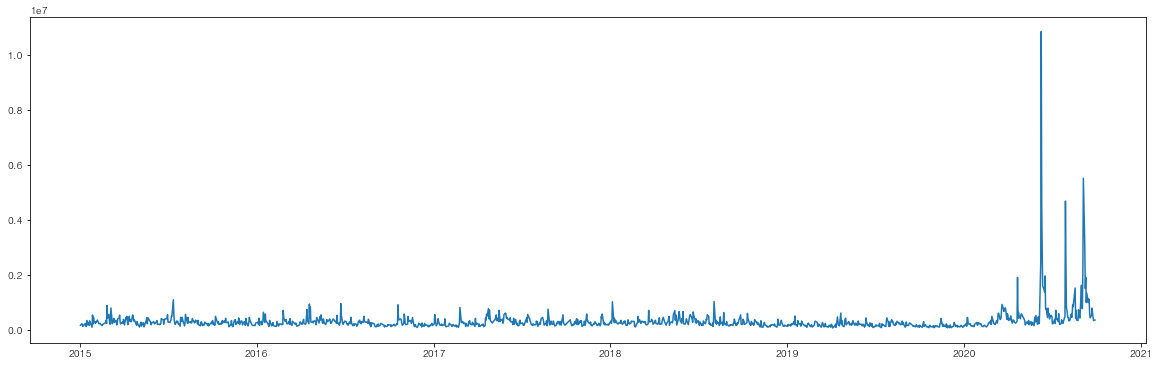

In [10]:
fig, ax = plt.subplots(figsize=(20,6))
ax.plot_date(idx, stock, '-')